In [149]:
import csv
import pandas as pd
import os
import subprocess
import json
import csv
import uuid
from IPython.display import display_javascript, display_html, display
import numpy as np
from datetime import datetime, date, time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import ast

sns.set_theme(style="whitegrid")

In [150]:
df = pd.read_csv('D:\HACKATHON\Russian_border_Ukraine.csv', encoding="utf8", parse_dates=['date'])

In [151]:
df.shape

(53040, 29)

In [152]:
df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'Searh'],
      dtype='object')

In [153]:
df['user'][0]

"{'_type': 'snscrape.modules.twitter.User', 'username': 'donveach', 'id': 2864827297, 'displayname': 'Don Veach', 'description': 'Proud New Orleanian. Tulane grad. Vote out anyone who praises or supports the Russian invasion of Ukraine #BidenHarris', 'rawDescription': 'Proud New Orleanian. Tulane grad. Vote out anyone who praises or supports the Russian invasion of Ukraine #BidenHarris', 'descriptionUrls': None, 'verified': False, 'created': '2014-10-19T11:37:54+00:00', 'followersCount': 1972, 'friendsCount': 1967, 'statusesCount': 1776, 'favouritesCount': 1459, 'listedCount': 0, 'mediaCount': 127, 'location': 'New Orleans, LA', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1287190374671364098/TCSvJovW_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/2864827297/1613400061', 'label': None, 'url': 'https://twitter.com/donveach'}"

In [154]:
df.sort_values(by='date', ascending=False)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/donveach/status/1500259722...,2022-03-05 23:59:25+00:00,Is that the same expensive and ineffective bor...,Is that the same expensive and ineffective bor...,1500259722112520194,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian border Ukraine
1,snscrape.modules.twitter.Tweet,https://twitter.com/deliveryman199/status/1500...,2022-03-05 23:58:30+00:00,@DonWaifu @gabehayes @aaronjmate So the Americ...,@DonWaifu @gabehayes @aaronjmate So the Americ...,1500259491232641025,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,2,...,NaN,NaN,1.500251e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russian border Ukraine
2,snscrape.modules.twitter.Tweet,https://twitter.com/JDiozzi/status/15002591158...,2022-03-05 23:57:01+00:00,Maybe if one military unit from Ukraine crosse...,Maybe if one military unit from Ukraine crosse...,1500259115863777280,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian border Ukraine
3,snscrape.modules.twitter.Tweet,https://twitter.com/Mom2ShihTzu/status/1500258...,2022-03-05 23:55:31+00:00,Volunteers cross Polish border into Ukraine to...,Volunteers cross Polish border into Ukraine to...,1500258740423086083,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian border Ukraine
4,snscrape.modules.twitter.Tweet,https://twitter.com/SiliconMatters/status/1500...,2022-03-05 23:54:18+00:00,@MarkHertling BUT... theres no Russian aircraf...,@MarkHertling BUT... theres no Russian aircraf...,1500258434414874625,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,4,...,NaN,NaN,1.500223e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russian border Ukraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53035,snscrape.modules.twitter.Tweet,https://twitter.com/orion7710/status/147671667...,2021-12-31 00:47:46+00:00,@Jerusalem_Post Well ... what now? It doesn't ...,@Jerusalem_Post Well ... what now? It doesn't ...,1476716676498530304,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,...,NaN,NaN,1.476691e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russian border Ukraine
53036,snscrape.modules.twitter.Tweet,https://twitter.com/KTVZ/status/14767138848327...,2021-12-31 00:36:40+00:00,President Joe Biden urged his Russian counterp...,President Joe Biden urged his Russian counterp...,1476713884832739332,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian border Ukraine
53037,snscrape.modules.twitter.Tweet,https://twitter.com/thenewsoncnbc/status/14767...,2021-12-31 00:32:51+00:00,President Biden and Russian President Putin sp...,President Biden and Russian President Putin sp...,1476712922252517376,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,8,10,...,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russian border Ukraine
53038,snscrape.modules.twitter.Tweet,https://twitter.com/golferbud68/status/1476710...,2021-12-31 00:22:44+00:00,"@MissAvaSays Secured border, pipelines still b...","@MissAvaSays Secured border, pipelines still b...",1476710375555047425,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,NaN,NaN,1.476693e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN,NaN,NaN,NaN,NaN,Russian border Ukraine


In [155]:
df = df.drop(columns=['Searh', 'id'])

In [156]:
df['Hour'] = df['date'].dt.hour
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['MonthName'] = df['date'].dt.month_name()
df['MonthDay'] = df['date'].dt.day
df['DayName'] = df['date'].dt.day_name()
df['Week'] = df['date'].dt.isocalendar().week

In [157]:
df['Date'] = [d.date() for d in df['date']]
df['Time'] = [d.time() for d in df['date']]

In [158]:
df.drop(columns=['date'], inplace=True)
df

,_type,url,content,renderedContent,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,cashtags,Hour,Year,Month,MonthName,MonthDay,DayName,Week,Date,Time
0,snscrape.modules.twitter.Tweet,https://twitter.com/donveach/status/1500259722...,Is that the same expensive and ineffective bor...,Is that the same expensive and ineffective bor...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,0,1500259722112520194,...,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:59:25
1,snscrape.modules.twitter.Tweet,https://twitter.com/deliveryman199/status/1500...,@DonWaifu @gabehayes @aaronjmate So the Americ...,@DonWaifu @gabehayes @aaronjmate So the Americ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,2,0,1500219139713114120,...,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:58:30
2,snscrape.modules.twitter.Tweet,https://twitter.com/JDiozzi/status/15002591158...,Maybe if one military unit from Ukraine crosse...,Maybe if one military unit from Ukraine crosse...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1500259115863777280,...,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:57:01
3,snscrape.modules.twitter.Tweet,https://twitter.com/Mom2ShihTzu/status/1500258...,Volunteers cross Polish border into Ukraine to...,Volunteers cross Polish border into Ukraine to...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,0,1500258740423086083,...,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:55:31
4,snscrape.modules.twitter.Tweet,https://twitter.com/SiliconMatters/status/1500...,@MarkHertling BUT... theres no Russian aircraf...,@MarkHertling BUT... theres no Russian aircraf...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,4,0,1500217869250011136,...,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:54:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53035,snscrape.modules.twitter.Tweet,https://twitter.com/orion7710/status/147671667...,@Jerusalem_Post Well ... what now? It doesn't ...,@Jerusalem_Post Well ... what now? It doesn't ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,0,1476690860066721792,...,NaN,0,2021,12,December,31,Friday,52,2021-12-31,00:47:46
53036,snscrape.modules.twitter.Tweet,https://twitter.com/KTVZ/status/14767138848327...,President Joe Biden urged his Russian counterp...,President Joe Biden urged his Russian counterp...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,0,1476713884832739332,...,NaN,0,2021,12,December,31,Friday,52,2021-12-31,00:36:40
53037,snscrape.modules.twitter.Tweet,https://twitter.com/thenewsoncnbc/status/14767...,President Biden and Russian President Putin sp...,President Biden and Russian President Putin sp...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,8,10,0,1476712922252517376,...,NaN,0,2021,12,December,31,Friday,52,2021-12-31,00:32:51
53038,snscrape.modules.twitter.Tweet,https://twitter.com/golferbud68/status/1476710...,"@MissAvaSays Secured border, pipelines still b...","@MissAvaSays Secured border, pipelines still b...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,0,1476693082116612104,...,NaN,0,2021,12,December,31,Friday,52,2021-12-31,00:22:44


In [159]:
df['Year'].value_counts()

2022    52926
2021      114
Name: Year, dtype: int64

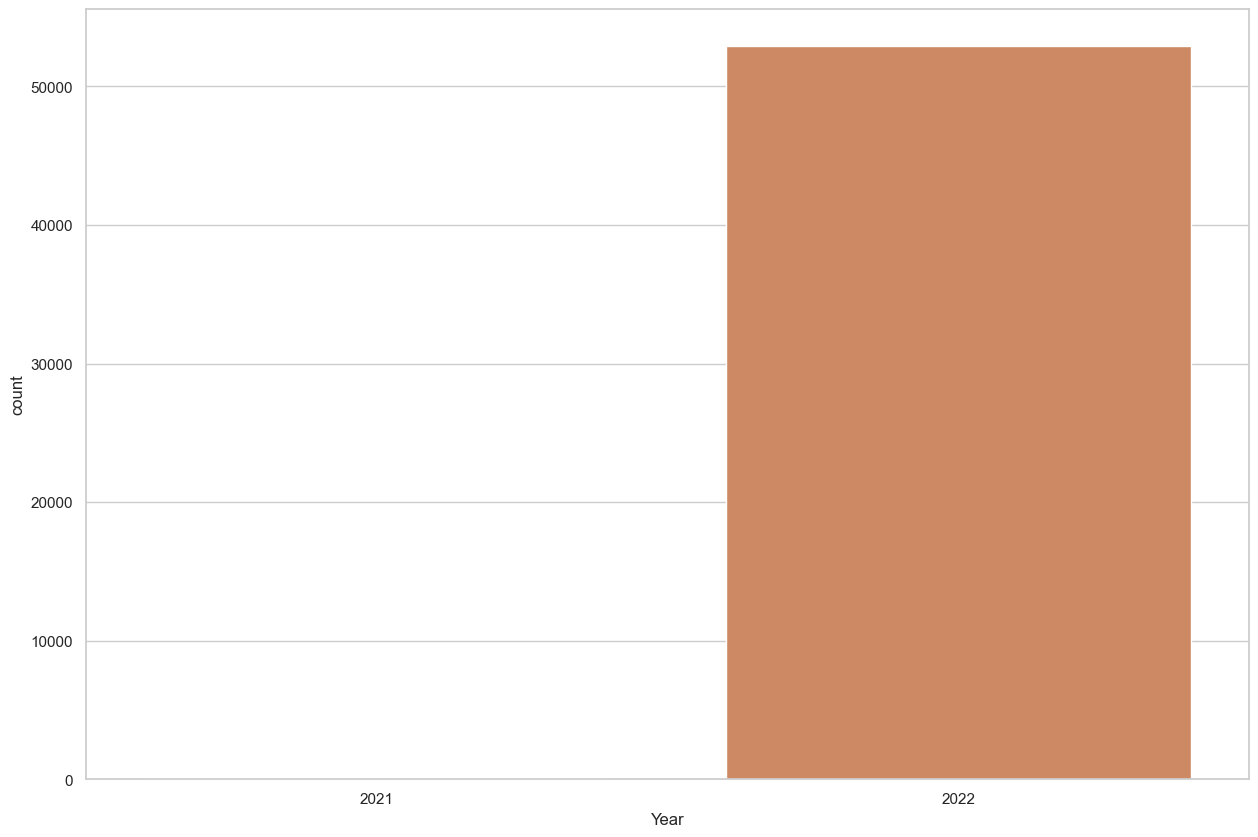

In [160]:
# count by year
f,ax = plt.subplots(figsize=(15,10))
sns.countplot(x=df['Year'])
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_height()+0.05, p.get_height()+20), fontsize=12)

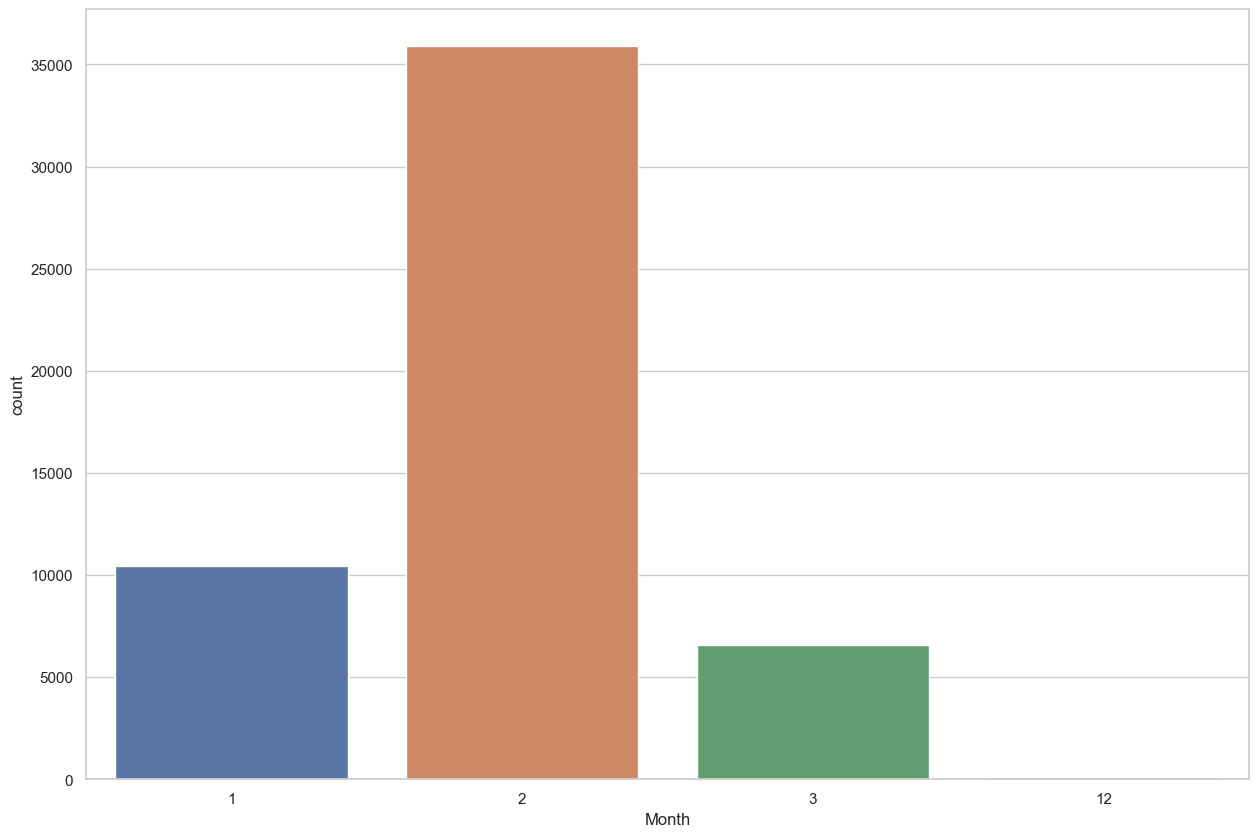

In [161]:
#count by month
f,ax = plt.subplots(figsize=(15,10))
sns.countplot(x=df['Month'])
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_height()+0.05, p.get_height()+20), fontsize=12)

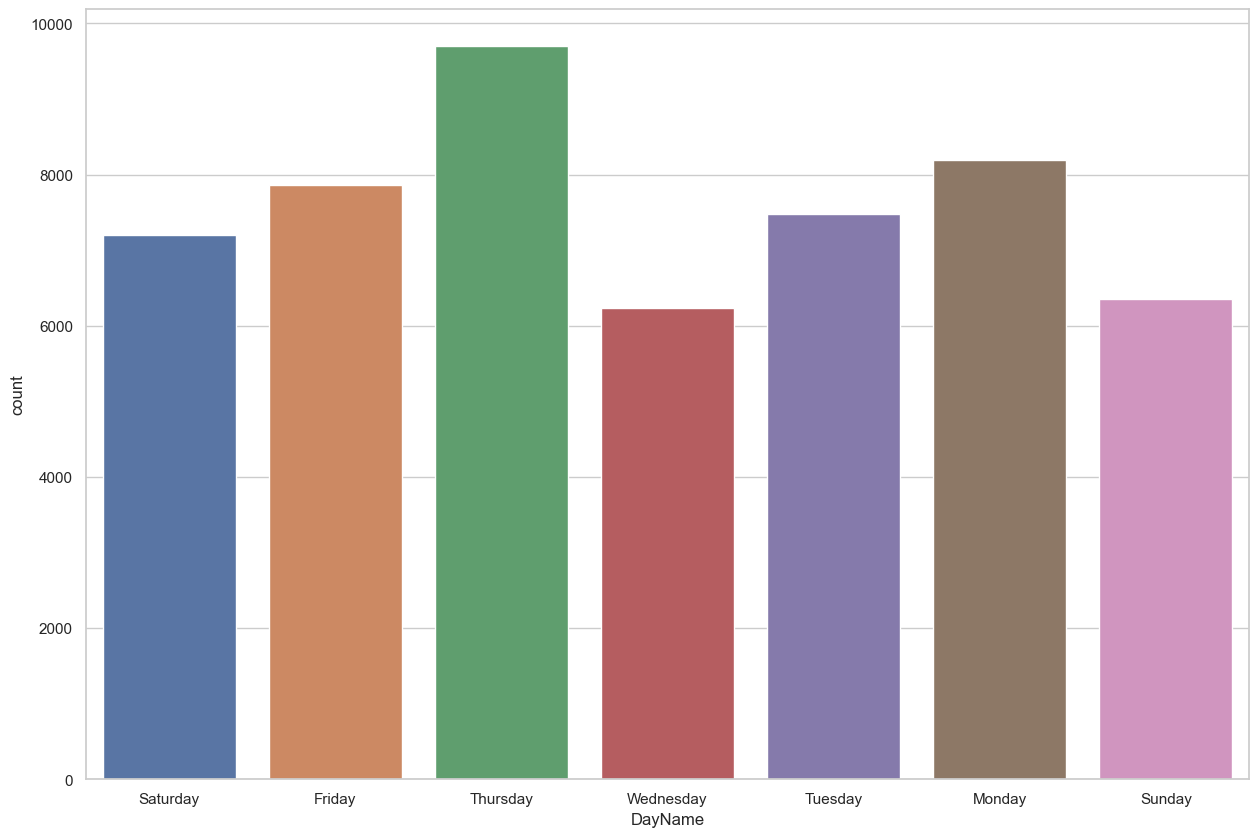

In [162]:
# count by day of week
f,ax = plt.subplots(figsize=(15,10))
sns.countplot(x=df['DayName'])
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_height()+0.05, p.get_height()+20), fontsize=12)

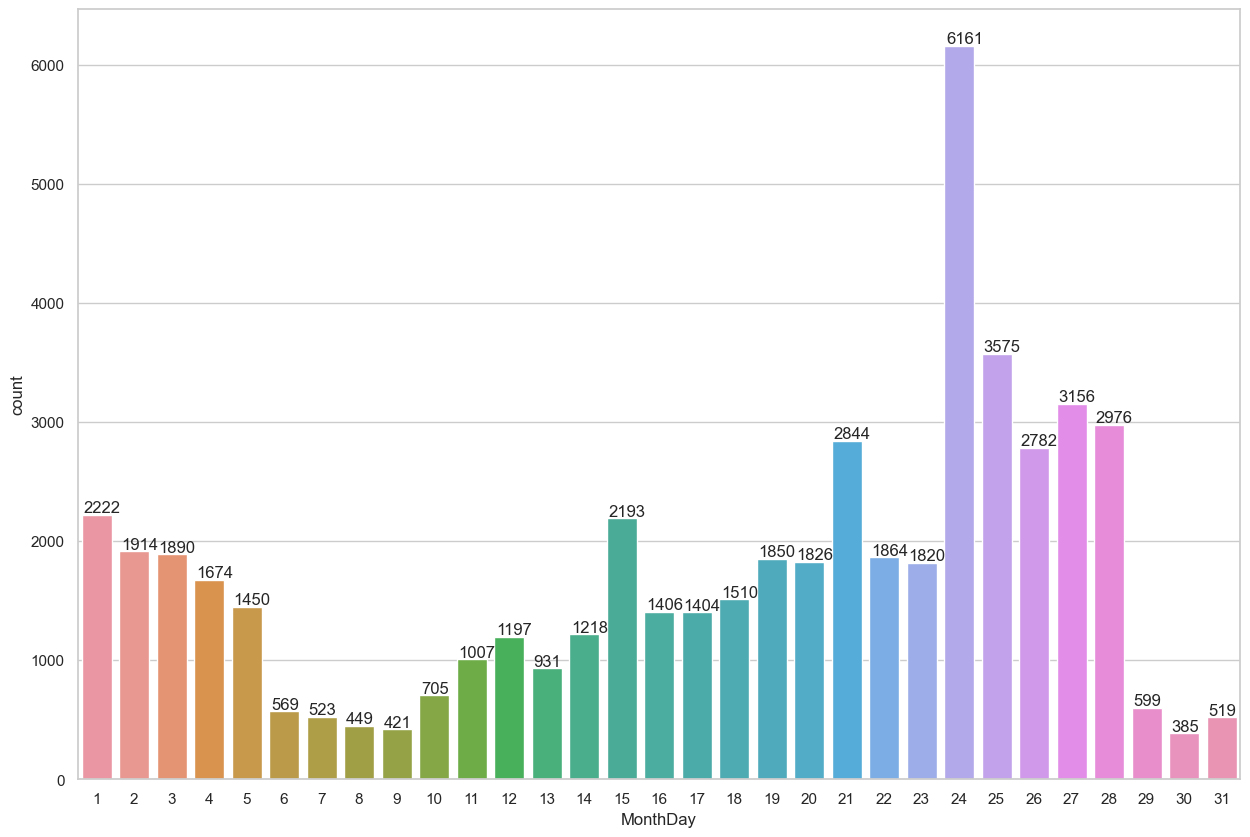

In [163]:
#count by day of month
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x= df['MonthDay'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+20), fontsize = 12)

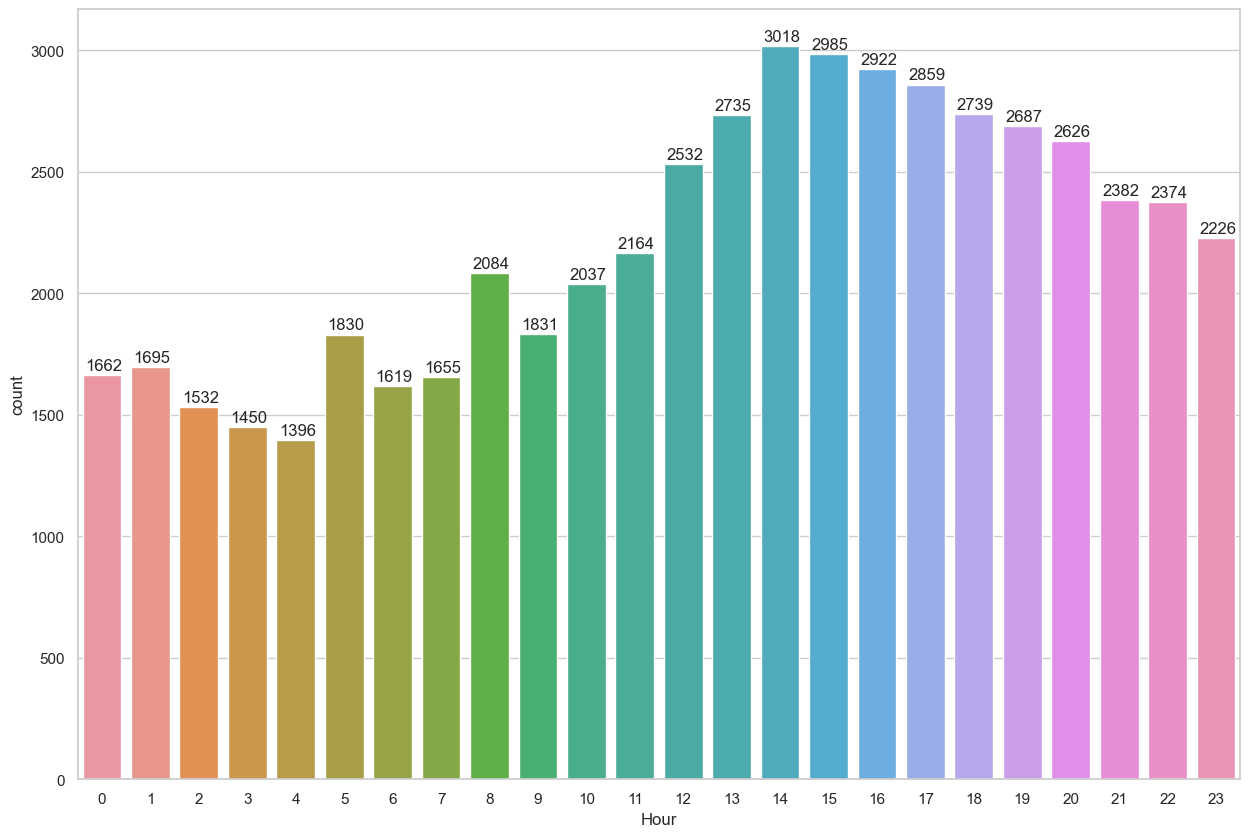

In [164]:
#count by day of hour
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x= df['Hour'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+20), fontsize = 12)

In [165]:
df.head(5)

,_type,url,content,renderedContent,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,cashtags,Hour,Year,Month,MonthName,MonthDay,DayName,Week,Date,Time
0,snscrape.modules.twitter.Tweet,https://twitter.com/donveach/status/1500259722...,Is that the same expensive and ineffective bor...,Is that the same expensive and ineffective bor...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,0,1500259722112520194,...,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:59:25
1,snscrape.modules.twitter.Tweet,https://twitter.com/deliveryman199/status/1500...,@DonWaifu @gabehayes @aaronjmate So the Americ...,@DonWaifu @gabehayes @aaronjmate So the Americ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,2,0,1500219139713114120,...,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:58:30
2,snscrape.modules.twitter.Tweet,https://twitter.com/JDiozzi/status/15002591158...,Maybe if one military unit from Ukraine crosse...,Maybe if one military unit from Ukraine crosse...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1500259115863777280,...,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:57:01
3,snscrape.modules.twitter.Tweet,https://twitter.com/Mom2ShihTzu/status/1500258...,Volunteers cross Polish border into Ukraine to...,Volunteers cross Polish border into Ukraine to...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,0,1500258740423086083,...,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:55:31
4,snscrape.modules.twitter.Tweet,https://twitter.com/SiliconMatters/status/1500...,@MarkHertling BUT... theres no Russian aircraf...,@MarkHertling BUT... theres no Russian aircraf...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,4,0,1500217869250011136,...,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:54:18


In [227]:
df.shape

(53040, 35)

In [226]:
df['tcooutlinks'].value_counts()

['https://t.co/YpgF4jbbsK']    85
['https://t.co/YpgF4iU8qK']    25
['https://t.co/19Exr4ZDpq']    15
['https://t.co/zN6ZWL3xui']    14
['https://t.co/GizQyapCJW']    11
                               ..
['https://t.co/MrvdSwN8OK']     1
['https://t.co/gQjwFfDG01']     1
['https://t.co/k4zSu9967l']     1
['https://t.co/GBWttZQ7xf']     1
['https://t.co/2GRpvjHOMP']     1
Name: tcooutlinks, Length: 16843, dtype: int64

In [167]:
df.columns

Index(['_type', 'url', 'content', 'renderedContent', 'user', 'replyCount',
       'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'lang',
       'source', 'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags', 'Hour', 'Year', 'Month', 'MonthName', 'MonthDay', 'DayName',
       'Week', 'Date', 'Time'],
      dtype='object')

In [218]:
useless_columns = ['_type', 'url', 'conversationId', 'source', 'sourceUrl', 'sourceLabel', 'tcooutlinks', 'media', 'lang', 'outlinks', 'quotedTweet', 'coordinates', 'inReplyToTweetId', 'retweetedTweet', 'inReplyToUser']
df_reduced = df.drop(columns=useless_columns)

In [219]:
df_reduced

,content,renderedContent,user,replyCount,retweetCount,likeCount,quoteCount,mentionedUsers,place,hashtags,cashtags,Hour,Year,Month,MonthName,MonthDay,DayName,Week,Date,Time
0,Is that the same expensive and ineffective bor...,Is that the same expensive and ineffective bor...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,0,NaN,NaN,NaN,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:59:25
1,@DonWaifu @gabehayes @aaronjmate So the Americ...,@DonWaifu @gabehayes @aaronjmate So the Americ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,2,0,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:58:30
2,Maybe if one military unit from Ukraine crosse...,Maybe if one military unit from Ukraine crosse...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,NaN,NaN,NaN,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:57:01
3,Volunteers cross Polish border into Ukraine to...,Volunteers cross Polish border into Ukraine to...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,0,NaN,NaN,NaN,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:55:31
4,@MarkHertling BUT... theres no Russian aircraf...,@MarkHertling BUT... theres no Russian aircraf...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,4,0,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,23,2022,3,March,5,Saturday,9,2022-03-05,23:54:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53035,@Jerusalem_Post Well ... what now? It doesn't ...,@Jerusalem_Post Well ... what now? It doesn't ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,0,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,0,2021,12,December,31,Friday,52,2021-12-31,00:47:46
53036,President Joe Biden urged his Russian counterp...,President Joe Biden urged his Russian counterp...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,0,NaN,NaN,NaN,NaN,0,2021,12,December,31,Friday,52,2021-12-31,00:36:40
53037,President Biden and Russian President Putin sp...,President Biden and Russian President Putin sp...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,8,10,0,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,0,2021,12,December,31,Friday,52,2021-12-31,00:32:51
53038,"@MissAvaSays Secured border, pipelines still b...","@MissAvaSays Secured border, pipelines still b...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,0,NaN,NaN,NaN,NaN,0,2021,12,December,31,Friday,52,2021-12-31,00:22:44


In [220]:
user = df_reduced['user'][0]
j = ast.literal_eval(user)
user_columns = pd.DataFrame(j, index=['id'])
print(user_columns.columns)
user_columns

Index(['_type', 'username', 'id', 'displayname', 'description',
       'rawDescription', 'descriptionUrls', 'verified', 'created',
       'followersCount', 'friendsCount', 'statusesCount', 'favouritesCount',
       'listedCount', 'mediaCount', 'location', 'protected', 'linkUrl',
       'linkTcourl', 'profileImageUrl', 'profileBannerUrl', 'label', 'url'],
      dtype='object')


,_type,username,id,displayname,description,rawDescription,descriptionUrls,verified,created,followersCount,...,listedCount,mediaCount,location,protected,linkUrl,linkTcourl,profileImageUrl,profileBannerUrl,label,url
id,snscrape.modules.twitter.User,donveach,2864827297,Don Veach,Proud New Orleanian. Tulane grad. Vote out any...,Proud New Orleanian. Tulane grad. Vote out any...,None,False,2014-10-19T11:37:54+00:00,1972,...,0,127,"New Orleans, LA",False,None,None,https://pbs.twimg.com/profile_images/128719037...,https://pbs.twimg.com/profile_banners/28648272...,None,https://twitter.com/donveach


In [223]:
useless_user_columns = ['_type', 'id', 'description', 'rawDescription' ,'descriptionUrls', 'protected', 'linkUrl', 'linkTcourl', 'profileImageUrl','profileBannerUrl', 'label', 'url']

#expand user column
df_user = pd.DataFrame(columns=user_columns.columns, index=range(0, len(df_reduced)))
for index, row in df_reduced.head().iterrows():
    user = ast.literal_eval(row['user'])
    df_user.loc[index] = user
df_user = df_user.drop(columns=useless_user_columns)
df_user = df_user.add_prefix('user_')

df_expanded = pd.concat([df_reduced, df_user], axis=1, join='inner')
df_expanded = df_expanded.drop(columns=['user'])
df_expanded.head(100)

,content,renderedContent,replyCount,retweetCount,likeCount,quoteCount,mentionedUsers,place,hashtags,cashtags,...,user_displayname,user_verified,user_created,user_followersCount,user_friendsCount,user_statusesCount,user_favouritesCount,user_listedCount,user_mediaCount,user_location
0,Is that the same expensive and ineffective bor...,Is that the same expensive and ineffective bor...,0,0,1,0,NaN,NaN,NaN,NaN,...,Don Veach,False,2014-10-19T11:37:54+00:00,1972,1967,1776,1459,0,127,"New Orleans, LA"
1,@DonWaifu @gabehayes @aaronjmate So the Americ...,@DonWaifu @gabehayes @aaronjmate So the Americ...,1,0,2,0,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,...,eli leon,False,2021-01-24T17:31:43+00:00,1,4,232,75,0,13,
2,Maybe if one military unit from Ukraine crosse...,Maybe if one military unit from Ukraine crosse...,0,0,0,0,NaN,NaN,NaN,NaN,...,Joseph Diozzi,False,2021-09-06T21:59:56+00:00,11,79,1019,598,0,3,
3,Volunteers cross Polish border into Ukraine to...,Volunteers cross Polish border into Ukraine to...,0,1,2,0,NaN,NaN,NaN,NaN,...,🌸MtnsRCallingMe🌸,False,2019-10-27T22:57:54+00:00,8141,8309,5423,21981,2,770,"Orlando, FL USA"
4,@MarkHertling BUT... theres no Russian aircraf...,@MarkHertling BUT... theres no Russian aircraf...,0,1,4,0,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,...,Ajeer,False,2020-05-23T18:51:01+00:00,396,692,2863,2256,0,291,"Silicon Valley, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"@sherabhamu @indian_ukraine Help will come, bu...","@sherabhamu @indian_ukraine Help will come, bu...",0,0,0,0,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,"""Steven Seagal Is willing to reboot Footloose,...","""Steven Seagal Is willing to reboot Footloose,...",2,0,7,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,"Yesterday President Zelenskyy said ""Immediate ...","Yesterday President Zelenskyy said ""Immediate ...",0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,@gillman_graham @MFoxxer @johnpilger Dated aft...,@gillman_graham @MFoxxer @johnpilger Dated aft...,0,0,0,0,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
df_expanded['mentionedUsers'].value_counts()

[{'_type': 'snscrape.modules.twitter.User', 'username': 'KremlinRussia_E', 'id': 205622130, 'displayname': 'President of Russia', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/KremlinRussia_E'}]                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
# expand mentioned_user
useless_user_columns = ['_type', 'id', 'description', 'rawDescription' ,'descriptionUrls', 'protected', 'linkUrl', 'linkTcourl', 'profileImageUrl','profileBannerUrl', 'label', 'url']

#expand user column
df_user = pd.DataFrame(columns=user_columns.columns, index=range(0, len(df_reduced)))
for index, row in df_reduced.head().iterrows():
    user = ast.literal_eval(row['user'])
    df_user.loc[index] = user
df_user = df_user.drop(columns=useless_user_columns)
df_user = df_user.add_prefix('user_')

df_expanded = pd.concat([df_reduced, df_user], axis=1, join='inner')
df_expanded = df_expanded.drop(columns=['user'])
df_expanded.head(100)